<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Tarea_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 10

Luis Fernando Erasmo Morales Carreto

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')
sns.set(style="whitegrid", palette="muted")
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


# Parte 1: Experimento con Subconjunto de Datos (10k/2k)
Para la primera parte de la tarea, se utilizará un subconjunto de datos (10,000 imágenes para entrenamiento y 2,000 para prueba). El objetivo de usar un conjunto de datos más pequeño es acelerar el entrenamiento y, más importante, inducir el sobreajuste de manera más pronunciada, ya que el modelo tendrá menos datos de los cuales generalizar.   

Ejercicio 1: Carga y Preprocesamiento de Datos
Se carga el conjunto de datos completo de MNIST y luego se seleccionan los subconjuntos especificados.

In [7]:
# 1. Cargar el dataset completo de MNIST
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()

# Verificar las dimensiones originales
print(f"Dimensiones originales de entrenamiento: {x_train_full.shape}")
print(f"Dimensiones originales de prueba: {x_test_full.shape}")

# 2. Crear los subconjuntos
N_TRAIN = 10000
N_TEST = 2000

x_train_subset = x_train_full[:N_TRAIN]
y_train_subset = y_train_full[:N_TRAIN]
x_test_subset = x_test_full[:N_TEST]
y_test_subset = y_test_full[:N_TEST]

print(f"\nDimensiones del subconjunto de entrenamiento: {x_train_subset.shape}")
print(f"Dimensiones del subconjunto de prueba: {x_test_subset.shape}")

Dimensiones originales de entrenamiento: (60000, 28, 28)
Dimensiones originales de prueba: (10000, 28, 28)

Dimensiones del subconjunto de entrenamiento: (10000, 28, 28)
Dimensiones del subconjunto de prueba: (2000, 28, 28)


Preprocesamiento necesario para alimentar los datos a una red neuronal densa.

In [8]:
# Definir constantes
INPUT_DIM = 784  # 28 * 28 píxeles
NUM_CLASSES = 10

# Aplanamiento (Reshaping)
# Las capas densas (Dense) requieren una entrada 1D (vector) por muestra.
# Se aplanan las imágenes de (28, 28) a un vector de 784 píxeles.
x_train = x_train_subset.reshape(N_TRAIN, INPUT_DIM)
x_test = x_test_subset.reshape(N_TEST, INPUT_DIM)

#Normalización
# Se convierten los datos de enteros (0-255) a flotantes (0.0-1.0).
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Codificación One-Hot
# Se convierten las etiquetas de enteros a vectores categóricos. Esto es necesario para la función de pérdida 'categorical_crossentropy'
y_train_cat = to_categorical(y_train_subset, NUM_CLASSES)
y_test_cat = to_categorical(y_test_subset, NUM_CLASSES)

print(f"\nForma de x_train después del preprocesamiento: {x_train.shape}")
print(f"Forma de y_train_cat después del preprocesamiento: {y_train_cat.shape}")
print(f"Ejemplo de etiqueta original (y_train): {y_train_subset[0]}")
print(f"Ejemplo de etiqueta one-hot (y_train_cat): {y_train_cat[0]}")


Forma de x_train después del preprocesamiento: (10000, 784)
Forma de y_train_cat después del preprocesamiento: (10000, 10)
Ejemplo de etiqueta original (y_train): 5
Ejemplo de etiqueta one-hot (y_train_cat): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Ejercicio 2 y 3: Modelo Base (Sin Regularización)
Solución Ejercicio 2: Se define la arquitectura de la red neuronal base según las especificaciones :

Una primera capa densa con 128 neuronas y activación ReLU.

Una segunda capa densa con 64 neuronas y activación ReLU.

Una capa de salida con 10 neuronas y activación Softmax (para clasificación multiclase).

El modelo se compila usando adam como optimizador y categorical_crossentropy como función de pérdida.   



In [9]:
def crear_modelo_base():

    model = Sequential(name="Modelo_Base")

    # Capa 1 (Oculta): 128 neuronas, ReLU
    model.add(Dense(128, activation='relu', input_shape=(INPUT_DIM,),
                    name="capa_oculta_1"))

    # Capa 2 (Oculta): 64 neuronas, ReLU
    model.add(Dense(64, activation='relu',
                    name="capa_oculta_2"))

    # Capa 3 (Salida): 10 neuronas, Softmax
    model.add(Dense(NUM_CLASSES, activation='softmax',
                    name="capa_salida"))

    # Compilación del modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_base = crear_modelo_base()
print("Arquitectura del Modelo Base ")
model_base.summary()

--- Arquitectura del Modelo Base ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_Base"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Se entrena el modelo base durante 100 épocas. Este número elevado de épocas, combinado con el conjunto de datos reducido, va a provocar el sobreajuste. Se utiliza un validation_split del 20% sobre los datos de entrenamiento (es decir, 8,000 para entrenar, 2,000 para validar).   

Entrenando el Modelo Base (Sin Regularización)...
Entrenamiento del Modelo Base completado.


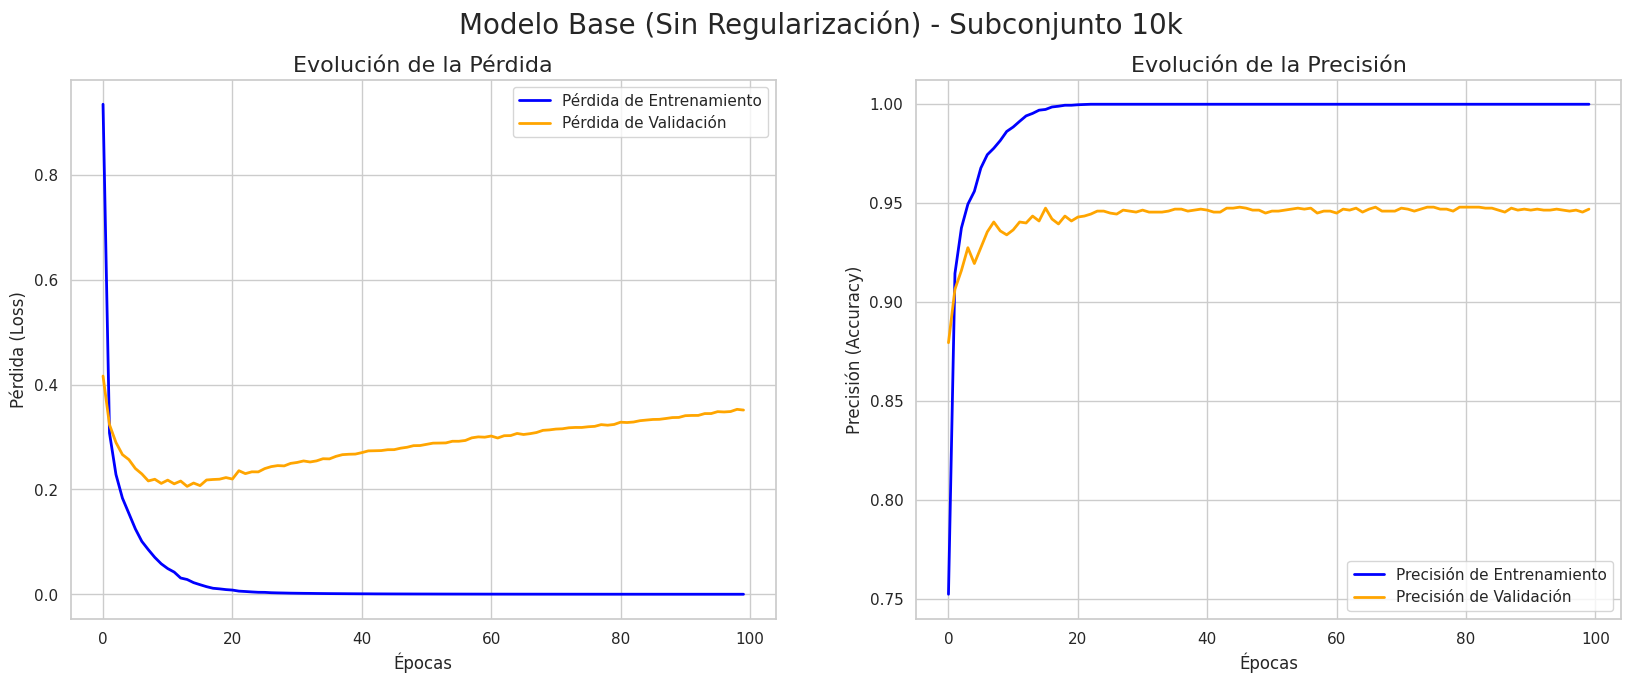

In [10]:
#Grafica las curvas de precisión y pérdida de entrenamiento y validación almacenadas en un objeto 'history' de Keras.
def plot_history(history, title):

    df_history = pd.DataFrame(history.history)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

    # Gráfica de Pérdida (Loss)
    ax1.plot(df_history['loss'], label='Pérdida de Entrenamiento', color='blue', linewidth=2)
    ax1.plot(df_history['val_loss'], label='Pérdida de Validación', color='orange', linewidth=2)
    ax1.set_title('Evolución de la Pérdida', fontsize=16)
    ax1.set_xlabel('Épocas', fontsize=12)
    ax1.set_ylabel('Pérdida (Loss)', fontsize=12)
    ax1.legend()

    # Gráfica de Precisión (Accuracy)
    ax2.plot(df_history['accuracy'], label='Precisión de Entrenamiento', color='blue', linewidth=2)
    ax2.plot(df_history['val_accuracy'], label='Precisión de Validación', color='orange', linewidth=2)
    ax2.set_title('Evolución de la Precisión', fontsize=16)
    ax2.set_xlabel('Épocas', fontsize=12)
    ax2.set_ylabel('Precisión (Accuracy)', fontsize=12)
    ax2.legend()

    fig.suptitle(title, fontsize=20)
    plt.show()

# Definir parámetros de entrenamiento
EPOCHS = 100
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128

# Entrenar el modelo base
print("Entrenando el Modelo Base (Sin Regularización):")
# verbose=0 para no saturar la salida del notebook
history_base = model_base.fit(
    x_train, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=0
)
print("Entrenamiento del Modelo Base completado.")

# Graficar los resultados del modelo base
plot_history(history_base, "Modelo Base (Sin Regularización) - Subconjunto 10k")

Modelo Regularizado (L2 + Dropout).Se define un segundo modelo con la misma arquitectura base, pero añadiendo las técnicas de regularización solicitadas :

Regularización L2 ($ \lambda=0.001 $): Se aplica un kernel_regularizer=l2(0.001) a los pesos (kernel) de las capas densas ocultas (weight decay), añade una penalización a la función de pérdida proporcional al cuadrado de los valores de los pesos. Esto desincentiva pesos grandes, lo que resulta en un modelo "más simple" y menos propenso a memorizar el ruido de los datos.   

Dropout ($ 30\% $): Se añade una capa Dropout(0.3) después de cada capa oculta. Durante el entrenamiento, esta capa "apaga" aleatoriamente el 30% de las neuronas de la capa anterior en cada paso. Esto previene la co-adaptación (que las neuronas dependan excesivamente de otras), forzando a la red a aprender características más robustas y redundantes.   



--- Arquitectura del Modelo Regularizado ---


Model: "Modelo_Regularizado"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_oculta_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el Modelo Regularizado (L2 + Dropout)...
Entrenamiento del Modelo Regularizado completado.


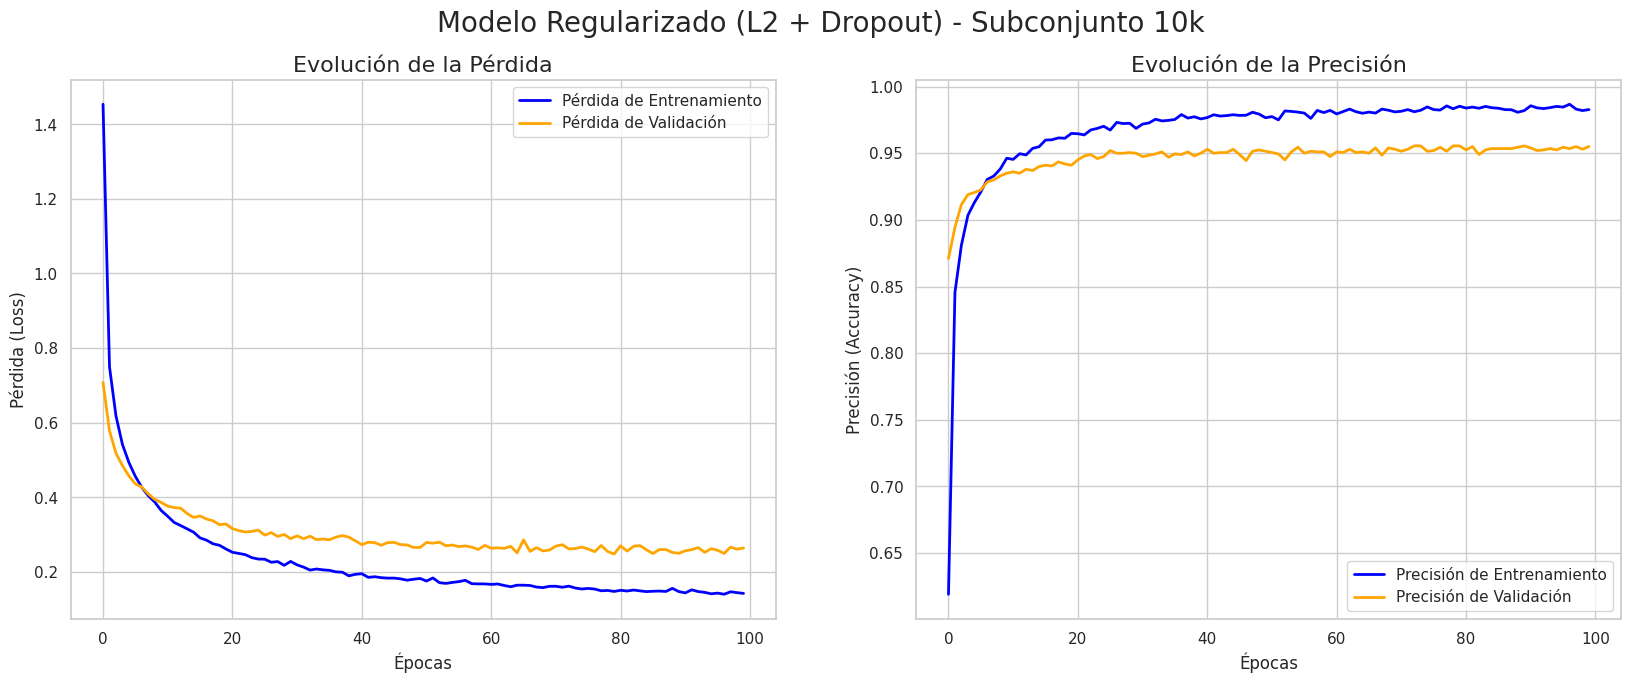

In [11]:
# Parámetros de regularización especificados en
L2_LAMBDA = 0.001
DROPOUT_RATE = 0.3

def crear_modelo_regularizado():
    model = Sequential(name="Modelo_Regularizado")

    # Capa 1 (Oculta) con L2 y seguida de Dropout
    model.add(Dense(128, activation='relu', input_shape=(INPUT_DIM,),
                    kernel_regularizer=l2(L2_LAMBDA),
                    name="capa_oculta_1"))
    model.add(Dropout(DROPOUT_RATE, name="dropout_1"))

    # Capa 2 (Oculta) con L2 y seguida de Dropout
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=l2(L2_LAMBDA),
                    name="capa_oculta_2"))
    model.add(Dropout(DROPOUT_RATE, name="dropout_2"))

    # Capa 3 (Salida) - Generalmente no se regulariza la capa de salida
    model.add(Dense(NUM_CLASSES, activation='softmax',
                    name="capa_salida"))

    # Compilación
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_reg = crear_modelo_regularizado()
print("Arquitectura del Modelo Regularizado:")
model_reg.summary()

# Entrenar el modelo regularizado
print("\nEntrenando el Modelo Regularizado (L2 + Dropout):")
history_reg = model_reg.fit(
    x_train, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=0
)
print("Entrenamiento del Modelo Regularizado completado.")

# Graficar los resultados del modelo regularizado
plot_history(history_reg, "Modelo Regularizado (L2 + Dropout) - Subconjunto 10k")

# Comparación de Curvas y Análisis
Para una comparación directa, se grafican las curvas de validación (pérdida y precisión) de ambos modelos en los mismos ejes.

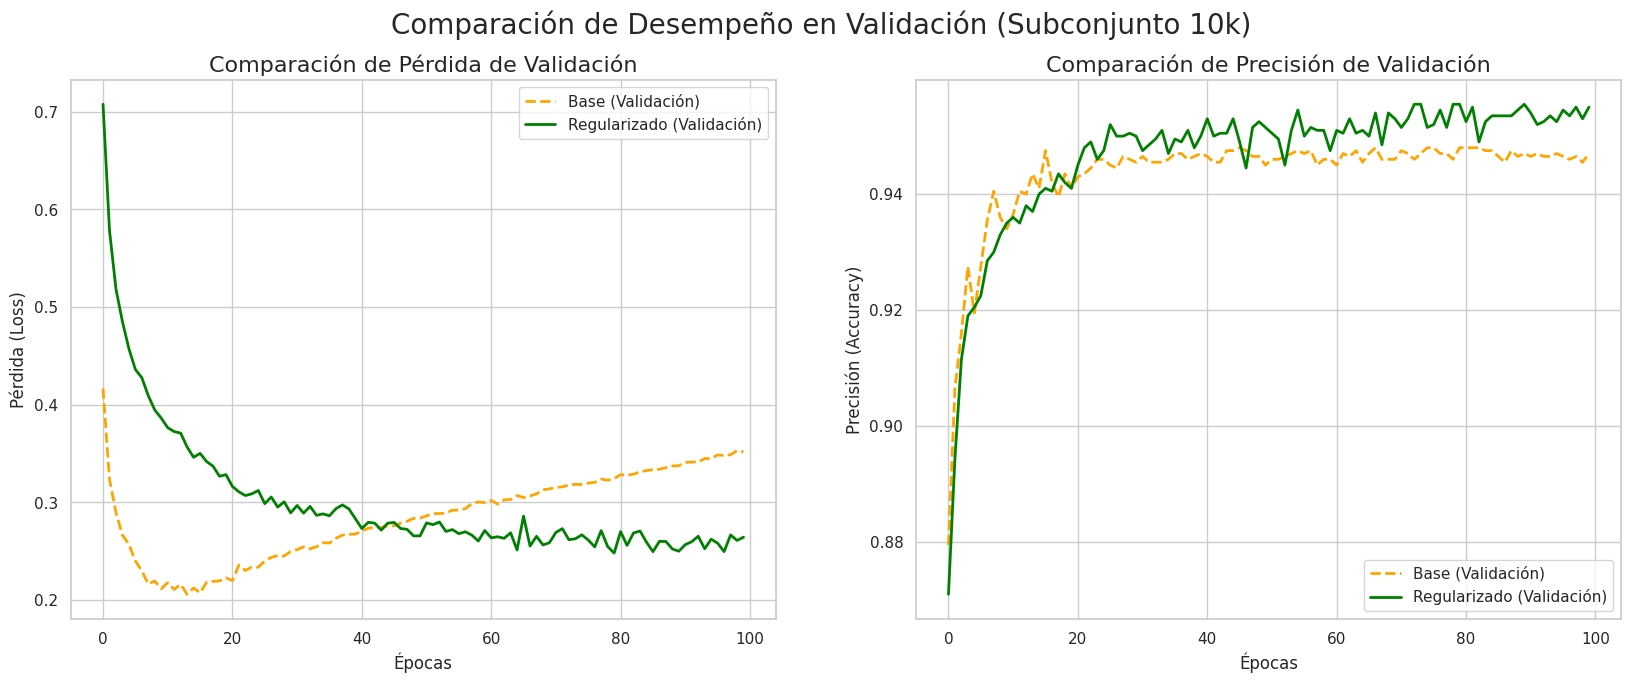

In [12]:
plt.figure(figsize=(20, 7))

# Subplot 1: Comparación de Pérdida de VALIDACIÓN
plt.subplot(1, 2, 1)
plt.plot(history_base.history['val_loss'], label='Base (Validación)', color='orange', linestyle='--', linewidth=2)
plt.plot(history_reg.history['val_loss'], label='Regularizado (Validación)', color='green', linewidth=2)
plt.title('Comparación de Pérdida de Validación', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (Loss)', fontsize=12)
plt.legend()
# plt.ylim(0, 0.5)

# Subplot 2: Comparación de Precisión de VALIDACIÓN
plt.subplot(1, 2, 2)
plt.plot(history_base.history['val_accuracy'], label='Base (Validación)', color='orange', linestyle='--', linewidth=2)
plt.plot(history_reg.history['val_accuracy'], label='Regularizado (Validación)', color='green', linewidth=2)
plt.title('Comparación de Precisión de Validación', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión (Accuracy)', fontsize=12)
plt.legend()
# plt.ylim(0.90, 1.0)

plt.suptitle('Comparación de Desempeño en Validación (Subconjunto 10k)', fontsize=20)
plt.show()

se aprecia un patrón clásico de sobreajuste en el modelo base (sin regularización) entrenado sobre el subconjunto de 10 k imágenes (8 k entrenamiento / 2 k validación): como se mostró, la loss de entrenamiento sigue disminuyendo mientras que la val_loss comienza a aumentar alrededor de las épocas 10–15, y la val_accuracy se estanca cerca de 0.94–0.95 y se vuelve más errática, abriéndose una brecha clara respecto al rendimiento en entrenamiento (que sigue creciendo hacia valores cercanos al 100%). En contraste, el modelo regularizado (L2 + Dropout) introduce el “freno” adecuado: aprende más lento (mayor loss de entrenamiento), pero su val_loss no diverge y se mantiene baja y estable durante las 100 épocas, mientras que la val_accuracy se sostiene ligeramente por encima del modelo base (0.95–0.955) con menor varianza, lo que indica mejor generalización. La regularización reduce la brecha train–val y permite entrenar más épocas sin degradación; con un EarlyStopping el modelo base podría detenerse cerca de su mejor val_loss, pero el regularizado alcanza un óptimo de validación superior de forma más robusta.

Se evalúa el rendimiento final de ambos modelos en el conjunto de prueba (x_test, y_test_cat). Este conjunto de 2,000 imágenes no ha sido visto por ninguno de los modelos, ni en entrenamiento ni en validación, por lo que representa la medida más fiable de su capacidad de generalización.   



In [14]:
# Evaluar el Modelo Base en el conjunto de prueba
print("Evaluando Modelo Base en el subconjunto de prueba...")
score_base = model_base.evaluate(x_test, y_test_cat, verbose=0)

# Evaluar el Modelo Regularizado en el conjunto de prueba
print("Evaluando Modelo Regularizado en el subconjunto de prueba...")
score_reg = model_reg.evaluate(x_test, y_test_cat, verbose=0)

print("\n--- Evaluación en Subconjunto de Prueba (2,000 imágenes) ---")
# score_base and score_reg are lists: [loss, accuracy]
print(f"Modelo Base:         Pérdida = {score_base[0]:.4f} | Precisión = {score_base[1]*100:.2f}%")
print(f"Modelo Regularizado: Pérdida = {score_reg[0]:.4f} | Precisión = {score_reg[1]*100:.2f}%")

Evaluando Modelo Base en el subconjunto de prueba...
Evaluando Modelo Regularizado en el subconjunto de prueba...

--- Evaluación en Subconjunto de Prueba (2,000 imágenes) ---
Modelo Base:         Pérdida = 0.3537 | Precisión = 94.00%
Modelo Regularizado: Pérdida = 0.2772 | Precisión = 94.35%


El **Modelo Base** obtuvo *loss* = 0.3537 y **accuracy** = 94.00%, mientras que el **Modelo Regularizado** logró *loss* = 0.2772 y **accuracy** = 94.35%. Esto implica una **reducción del 21.6% en la pérdida** y una **mejora de +0.35 puntos porcentuales** en precisión (≈ +0.37% relativa). Los resultados son coherentes con las curvas de validación: la regularización controla el sobreajuste y ofrece **mejor generalización y mejor calibración** (menor *loss*). La diferencia en precisión es **modesta** y, con n = 2000, podría caer dentro del margen estadístico (~±1 pp); para confirmarlo, conviene aplicar una **prueba de McNemar** con las predicciones emparejadas.



Se repite el experimento (entrenamiento y evaluación de ambos modelos, base y regularizado), pero esta vez utilizando el conjunto de datos completo de MNIST: 60,000 imágenes para entrenamiento y 10,000 para prueba.   

El propósito es observar cómo se comportan el sobreajuste y la regularización cuando se dispone de una cantidad de datos mucho mayor. Se espera que un conjunto de datos más grande actúe por sí mismo como una forma de regularización.   



In [15]:
# 1. Preprocesar los datos completos
INPUT_DIM = 784
NUM_CLASSES = 10

# Aplanar y Normalizar
x_train_full_proc = x_train_full.reshape(60000, INPUT_DIM).astype('float32') / 255.0
x_test_full_proc = x_test_full.reshape(10000, INPUT_DIM).astype('float32') / 255.0

# One-Hot Encoding
y_train_full_cat = to_categorical(y_train_full, NUM_CLASSES)
y_test_full_cat = to_categorical(y_test_full, NUM_CLASSES)

print(f"Forma de x_train_full_proc: {x_train_full_proc.shape}")
print(f"Forma de y_train_full_cat: {y_train_full_cat.shape}")
print(f"Forma de x_test_full_proc: {x_test_full_proc.shape}")
print(f"Forma de y_test_full_cat: {y_test_full_cat.shape}")

Forma de x_train_full_proc: (60000, 784)
Forma de y_train_full_cat: (60000, 10)
Forma de x_test_full_proc: (10000, 784)
Forma de y_test_full_cat: (10000, 10)


In [16]:
# 2. Crear nuevas instancias de los modelos
model_base_full = crear_modelo_base()
model_reg_full = crear_modelo_regularizado()

# 3. Entrenar Modelo Base (Datos Completos)
print("Entrenando el Modelo Base (Datos Completos):")
history_base_full = model_base_full.fit(
    x_train_full_proc, y_train_full_cat,
    epochs=EPOCHS,  # Se mantienen las 100 épocas para comparar
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT, # 20% de 60k = 48k train, 12k val
    verbose=0
)
print("Entrenamiento completado.")

# 4. Entrenar Modelo Regularizado (Datos Completos)
print("\nEntrenando el Modelo Regularizado (Datos Completos):")
history_reg_full = model_reg_full.fit(
    x_train_full_proc, y_train_full_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=0
)
print("Entrenamiento completado.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando el Modelo Base (Datos Completos)...
Entrenamiento completado.

Entrenando el Modelo Regularizado (Datos Completos)...
Entrenamiento completado.


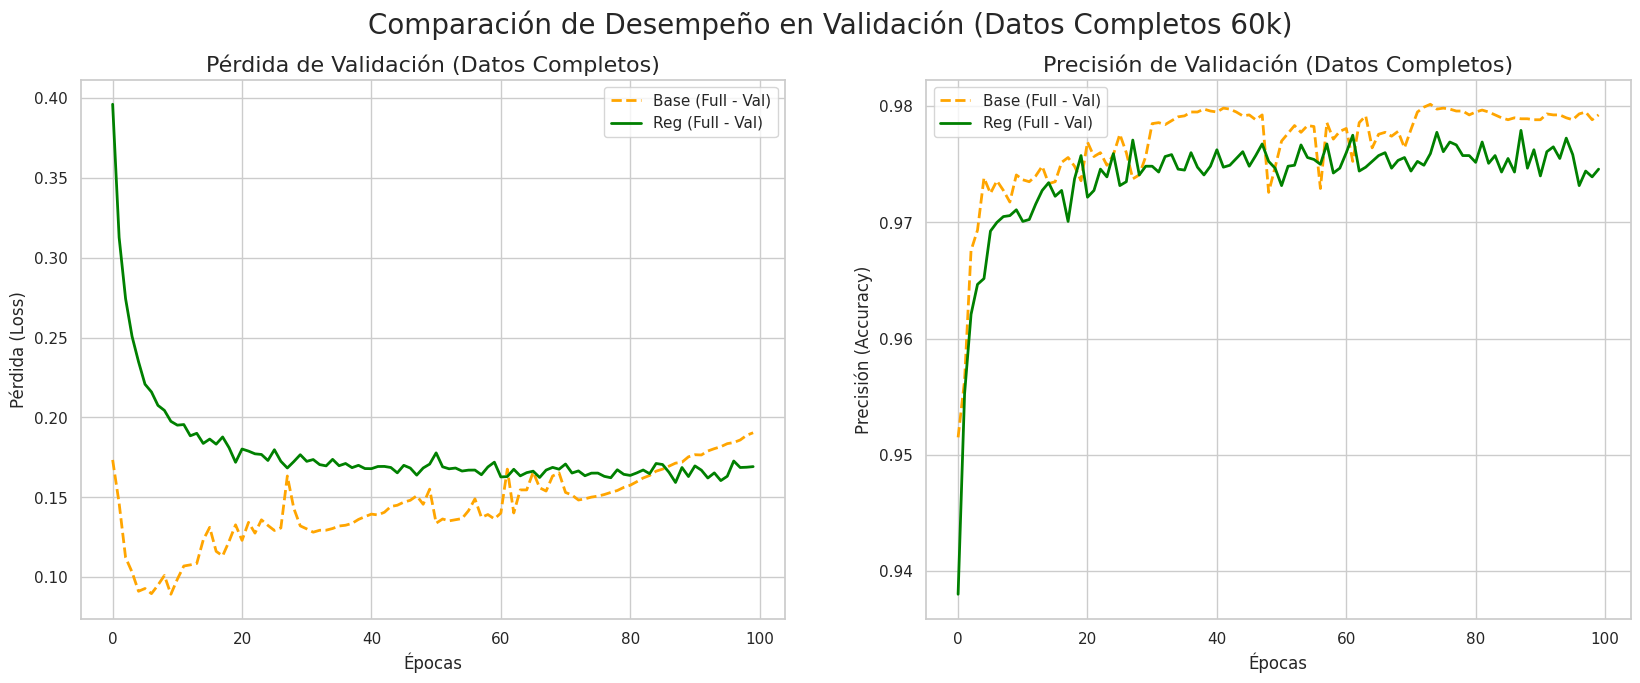

In [17]:
# 5. Graficar comparativa de validación para los datos COMPLETOS
plt.figure(figsize=(20, 7))

# Comparación de Pérdida de VALIDACIÓN
plt.subplot(1, 2, 1)
plt.plot(history_base_full.history['val_loss'], label='Base (Full - Val)', color='orange', linestyle='--', linewidth=2)
plt.plot(history_reg_full.history['val_loss'], label='Reg (Full - Val)', color='green', linewidth=2)
plt.title('Pérdida de Validación (Datos Completos)', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (Loss)', fontsize=12)
plt.legend()

# Comparación de Precisión de VALIDACIÓN
plt.subplot(1, 2, 2)
plt.plot(history_base_full.history['val_accuracy'], label='Base (Full - Val)', color='orange', linestyle='--', linewidth=2)
plt.plot(history_reg_full.history['val_accuracy'], label='Reg (Full - Val)', color='green', linewidth=2)
plt.title('Precisión de Validación (Datos Completos)', fontsize=16)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Precisión (Accuracy)', fontsize=12)
plt.legend()

plt.suptitle('Comparación de Desempeño en Validación (Datos Completos 60k)', fontsize=20)
plt.show()

In [19]:
# 6. Evaluación Final en el conjunto de prueba completo
print("Evaluando modelos en el conjunto de prueba completo (10,000 imágenes)...")
score_base_full = model_base_full.evaluate(x_test_full_proc, y_test_full_cat, verbose=0)
score_reg_full = model_reg_full.evaluate(x_test_full_proc, y_test_full_cat, verbose=0)

print("\n Evaluación en Conjunto de Prueba Completo (10,000 imágenes)")
print(f"Modelo Base (Full):         Pérdida = {score_base_full[0]:.4f} | Precisión = {score_base_full[1]*100:.2f}%")
print(f"Modelo Regularizado (Full): Pérdida = {score_reg_full[0]:.4f} | Precisión = {score_reg_full[1]*100:.2f}%")

Evaluando modelos en el conjunto de prueba completo (10,000 imágenes)...

--- Evaluación en Conjunto de Prueba Completo (10,000 imágenes) ---
Modelo Base (Full):         Pérdida = 0.1693 | Precisión = 98.08%
Modelo Regularizado (Full): Pérdida = 0.1661 | Precisión = 97.60%


En el conjunto de prueba completo (10 000 imágenes), el Modelo Base (Full) obtuvo pérdida = 0.1693 y precisión = 98.08%, mientras que el Modelo Regularizado (Full) logró pérdida = 0.1661 y precisión = 97.60%. Estos resultados confirman que, con más datos, el sobreajuste del modelo base se atenúa (los datos actúan como regularizador natural), aunque persiste una brecha train–val moderada; a la vez, la regularización algorítmica (L2 + Dropout) sigue aportando valor al mejorar la calibración del modelo (menor pérdida) incluso si no maximiza la exactitud.



El sobreajuste es un problema inversamente proporcional al tamaño (y diversidad) de los datos de entrenamiento.

# Análisis de Sensibilidad de Hiperparámetros
Variación de L2 y Tasa de Dropout: se analiza cómo la magnitud de los hiperparámetros de regularización ($ \lambda $ de L2 y la tasa de Dropout) afecta el rendimiento final del modelo. El objetivo es encontrar el Goldilocks.

Regularización insuficiente (valores muy bajos): El modelo seguirá sufriendo de sobreajuste (overfitting).

Regularización excesiva (valores muy altos): El modelo será incapaz de aprender, sufriendo de subajuste (underfitting).   

Para este análisis se utiliza el conjunto de datos completo (60k/10k) y se reduce el número de épocas a 30, ya que esto es suficiente para observar la tendencia.


**Análisis de Sensibilidad del parámetro $ \lambda $ (L2)
Se mantiene fija la tasa de Dropout (0.3) y se varía el valor de $ \lambda $ de L2.**

<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1671291250.py:51: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Precisión en Prueba vs. Regularización L2 ($ \lambda $)', fontsize=16)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Entrenando con L2 Lambda = 0.1 ---
Precisión en Prueba: 91.14%
--- Entrenando con L2 Lambda = 0.01 ---
Precisión en Prueba: 95.95%
--- Entrenando con L2 Lambda = 0.001 ---
Precisión en Prueba: 97.77%
--- Entrenando con L2 Lambda = 0.0001 ---
Precisión en Prueba: 97.98%
--- Entrenando con L2 Lambda = 0.0 ---
Precisión en Prueba: 98.08%

--- Resultados del Análisis de Sensibilidad L2 ---
            loss  accuracy
0.1000  0.642436    0.9114
0.0100  0.311270    0.9595
0.0010  0.166082    0.9777
0.0001  0.114843    0.9798
0.0000  0.073759    0.9808


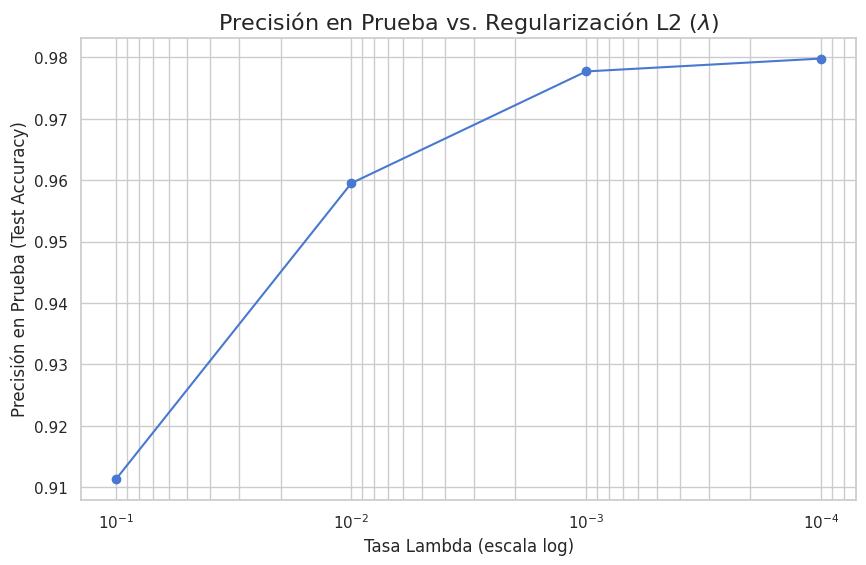

In [21]:
# 1. Análisis de Sensibilidad del parámetro Lambda (L2)
# Se mantiene Dropout en 0.3 y se varía L2_LAMBDA
lambdas = [1e-1, 1e-2, 1e-3, 1e-4, 0.0] # 0.1, 0.01, 0.001, 0.0001, 0.0
l2_scores = {}

# Reducimos las épocas para acelerar el proceso
EPOCHS_SENSITIVITY = 30

for l_val in lambdas:
    print(f"--- Entrenando con L2 Lambda = {l_val} ---")

    # Definir el modelo
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(INPUT_DIM,),
                    kernel_regularizer=l2(l_val))) # Lambda variable
    model.add(Dropout(DROPOUT_RATE)) # Dropout fijo (0.3)
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=l2(l_val))) # Lambda variable
    model.add(Dropout(DROPOUT_RATE)) # Dropout fijo (0.3)
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar
    model.fit(
        x_train_full_proc, y_train_full_cat,
        epochs=EPOCHS_SENSITIVITY,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        verbose=0
    )

    # Evaluar
    score = model.evaluate(x_test_full_proc, y_test_full_cat, verbose=0)
    l2_scores[l_val] = score # Guardar score (loss, accuracy) en prueba
    print(f"Precisión en Prueba: {score[1]*100:.2f}%")


# Crear la tabla de resultados
df_l2 = pd.DataFrame.from_dict(l2_scores, orient='index', columns=['loss', 'accuracy'])
df_l2 = df_l2.sort_index(ascending=False)
print("\n--- Resultados del Análisis de Sensibilidad L2 ---")
print(df_l2)

# Graficar la precisión final en prueba vs. Lambda
# Usamos un eje X logarítmico (excepto para 0)
plot_df_l2 = df_l2.drop(0.0) # Quitar el 0.0 para la escala log
plt.figure(figsize=(10, 6))
plt.semilogx(plot_df_l2.index, plot_df_l2['accuracy'], marker='o', linestyle='-')
plt.title('Precisión en Prueba vs. Regularización L2 ($ \lambda $)', fontsize=16)
plt.xlabel('Tasa Lambda (escala log)', fontsize=12)
plt.ylabel('Precisión en Prueba (Test Accuracy)', fontsize=12)
plt.gca().invert_xaxis() # Poner los valores más grandes primero
plt.grid(True, which="both")
plt.show()

In [22]:
# 2. Análisis de Sensibilidad de la Tasa de Dropout
# Se mantiene L2 en 0.001 y se varía DROPOUT_RATE

dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7]
dropout_scores = {}

for dr in dropout_rates:
    print(f"--- Entrenando con Tasa de Dropout = {dr} ---")

    # Definir el modelo
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(INPUT_DIM,),
                    kernel_regularizer=l2(L2_LAMBDA))) # L2 fijo (0.001)
    model.add(Dropout(dr)) # Dropout variable
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=l2(L2_LAMBDA))) # L2 fijo (0.001)
    model.add(Dropout(dr)) # Dropout variable
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar
    model.fit(
        x_train_full_proc, y_train_full_cat,
        epochs=EPOCHS_SENSITIVITY,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        verbose=0
    )

    # Evaluar
    score = model.evaluate(x_test_full_proc, y_test_full_cat, verbose=0)
    dropout_scores[dr] = score # Guardar precisión en prueba
    print(f"Precisión en Prueba: {score[1]*100:.2f}%")

# Crear la tabla de resultados
df_dropout = pd.DataFrame.from_dict(dropout_scores, orient='index', columns=['loss', 'accuracy'])
df_dropout = df_dropout.sort_index()
print("\n--- Resultados del Análisis de Sensibilidad Dropout ---")
print(df_dropout)

# Graficar la precisión final en prueba vs. Tasa de Dropout
plt.figure(figsize=(10, 6))
plt.plot(df_dropout.index, df_dropout['accuracy'], marker='o', linestyle='-')
plt.title('Precisión en Prueba vs. Tasa de Dropout', fontsize=16)
plt.xlabel('Tasa de Dropout', fontsize=12)
plt.ylabel('Precisión en Prueba (Test Accuracy)', fontsize=12)
plt.grid(True)
plt.show()

--- Entrenando con Tasa de Dropout = 0.0 ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión en Prueba: 97.65%
--- Entrenando con Tasa de Dropout = 0.1 ---
Precisión en Prueba: 97.70%
--- Entrenando con Tasa de Dropout = 0.2 ---
Precisión en Prueba: 97.67%
--- Entrenando con Tasa de Dropout = 0.3 ---
Precisión en Prueba: 97.49%
--- Entrenando con Tasa de Dropout = 0.4 ---
Precisión en Prueba: 97.15%
--- Entrenando con Tasa de Dropout = 0.5 ---
Precisión en Prueba: 96.62%
--- Entrenando con Tasa de Dropout = 0.7 ---
Precisión en Prueba: 95.07%

--- Resultados del Análisis de Sensibilidad Dropout ---
         loss  accuracy
0.0  0.142883    0.9765
0.1  0.150950    0.9770
0.2  0.156786    0.9767
0.3  0.167040    0.9749
0.4  0.187920    0.9715
0.5  0.213481    0.9662
0.7  0.300863    0.9507


El barrido de regularización L2 muestra un claro “punto dulce”: con $\lambda=10^{-1}$ la precisión cae a $\approx 91%$ por subajuste; con $\lambda=10^{-2}$ sube a $\sim 96%$; y el mejor rango es $\lambda\in[10^{-3},10^{-4}]$, donde se obtiene $\approx 98%$ en prueba.

Para **dropout**, manteniendo fijos los demás hiperparámetros, el óptimo es pequeño, $p\approx0.1$--$0.2$ (97.70% y 97.67%), comparable o levemente superior a $p=0.0$ (97.65%); a partir de $p\ge 0.3$ la precisión decrece de forma sostenida hasta 95.07% con $p=0.7$, evidenciando subajuste por apagado excesivo.


Con el conjunto completo de datos los propios datos actúan como regularizador y una L2 moderada aporta la mayor ganancia, mientras que un dropout pequeño puede ayudar.